# Data Understanding

In [1]:
import pandas as pd
data_train = pd.read_csv("../data/Train_Keystroke.csv")
data_train

press-0  release-0  press-1  release-1  press-2  release-2  press-3  \
0          0        166       86        271      200        296      364   
1          0         72      196        270      315        417      544   
2          0         31      418        487      623        695      780   
3          0          1        1         45      146        201      386   
4          0         71      312        406     1829       1926     2063   
..       ...        ...      ...        ...      ...        ...      ...   
745        0         69      217        303      453        525      574   
746        0        121      258        547      472        669      669   
747        0         35      795        880      959       1027     1339   
748        0         59      175        285      368        444      514   
749        0         65      181        253      396        437      501   

     release-3  press-4  release-4  ...  release-8  press-9  release-9  \
0          513      664        752  ...       1501     1473       1629   
1          616      694        761  ...       1448     1529       1636   
2          820     1239       1319  ...       2591     2740       2783   
3          473      594        681  ...       1553     1665       1761   
4         2183     2160       2263  ...       3208     3309       3431   
..         ...      ...        ...  ...        ...      ...        ...   
745        689      663        817  ...       1661     1758       1856   
746        767      833        955  ...       2136     2195       2279   
747       1399     1531       1603  ...       2379     2457       2499   
748        600      673        767  ...       1568     1680       1837   
749        569      717        773  ...       1660     1687       1733   

     press-10  release-10  press-11  release-11  press-12  release-12  UserID  
0        1602        1831      1736        1924      1831        2035      73  
1        1736        1815      1969        2040      2185        2265      32  
2        2902        2951      3071        3119      3216        3263      61  
3        1939        2010      2170        2240      2426        2513      77  
4        3607        3783      3784        3911      3911        4058      24  
..        ...         ...       ...         ...       ...         ...     ...  
745      1997        2080      2048        2154      2282        2350      22  
746      2328        2440      2540        2607      2728        2799      13  
747      2624        2667      2720        2763      2899        2939      67  
748      1874        1967      2035        2102      2274        2344     105  
749      1875        1933      1976        2037      2195        2213     100  

[750 rows x 27 columns]

In [2]:
# check data types
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   press-0     750 non-null    int64
 1   release-0   750 non-null    int64
 2   press-1     750 non-null    int64
 3   release-1   750 non-null    int64
 4   press-2     750 non-null    int64
 5   release-2   750 non-null    int64
 6   press-3     750 non-null    int64
 7   release-3   750 non-null    int64
 8   press-4     750 non-null    int64
 9   release-4   750 non-null    int64
 10  press-5     750 non-null    int64
 11  release-5   750 non-null    int64
 12  press-6     750 non-null    int64
 13  release-6   750 non-null    int64
 14  press-7     750 non-null    int64
 15  release-7   750 non-null    int64
 16  press-8     750 non-null    int64
 17  release-8   750 non-null    int64
 18  press-9     750 non-null    int64
 19  release-9   750 non-null    int64
 20  press-10    750 non-null    int6

In [3]:
# check if there is any null values
data_train.isnull().any()

press-0       False
release-0     False
press-1       False
release-1     False
press-2       False
release-2     False
press-3       False
release-3     False
press-4       False
release-4     False
press-5       False
release-5     False
press-6       False
release-6     False
press-7       False
release-7     False
press-8       False
release-8     False
press-9       False
release-9     False
press-10      False
release-10    False
press-11      False
release-11    False
press-12      False
release-12    False
UserID        False
dtype: bool

In that dataset as I can see it's really difficult to calculate flight time because candidates write with 2 hands. I can understand that from first release time and second press time difference. Therefore, I decided to calculate press to press duration, hold duration, release to press duration and release to release duration

# Feature Engineering

In [4]:
# Imagined that I have large data. Therefore, used iretable because of performanse. 
def calculate_duration(first_array, second_array):
    if len(first_array) == len(second_array):
        for i in range(len(second_array)):
            duration = int(first_array[i] - second_array[i])
            yield duration
    else:
        print("Lenght of array doesnt match")

In [5]:
# extract features
import numpy as np

init_columns = data_train.columns[:-1]
for idx in range(len(init_columns)):
    try:
        if idx % 2 == 0:            
            #print(f"p2p-duration-{int(idx/2)} = {init_columns[idx+2]} - {init_columns[idx]}")
            p2p_duration = np.fromiter(calculate_duration(data_train[init_columns[int(idx+2)]].values, data_train[init_columns[int(idx)]].values), int, count=-1)
            data_train[f"p2p-duration-{int(idx/2)}"] = p2p_duration
            
            #print(f"h-duration-{int(idx/2)} = {init_columns[idx+1]} - {init_columns[idx]}")
            h_duration = np.fromiter(calculate_duration(data_train[init_columns[int(idx+1)]].values, data_train[init_columns[int(idx)]].values), int, count=-1)
            data_train[f"h-duration-{int(idx/2)}"] = h_duration
        else:
            #print(f"r2p-duration-{int(idx/2)} = {init_columns[idx+2]} - {init_columns[idx-1]}")
            r2p_duration = np.fromiter(calculate_duration(data_train[init_columns[int(idx+2)]].values, data_train[init_columns[int(idx-1)]].values), int, count=-1)
            data_train[f"r2p-duration-{int(idx/2)}"] = r2p_duration
            
            #print(f"r-duration-{int(idx/2)} = {init_columns[idx+1]}")
            #r_duration = np.fromiter(calculate_duration(data_train[init_columns[int(idx+2)]].values, data_train[init_columns[int(idx)]].values), int, count=-1)
            #data_train[f"r2r-duration-{int(idx/2)}"] = r_duration
            
            #print(f"r2r-duration-{int(idx/2)} = {init_columns[idx+2]} - {init_columns[idx]}")
            r2r_duration = np.fromiter(calculate_duration(data_train[init_columns[int(idx+2)]].values, data_train[init_columns[int(idx)]].values), int, count=-1)
            data_train[f"r2r-duration-{int(idx/2)}"] = r2r_duration
            
    except IndexError:
        pass

Ignore highes 5 and smallest 5 scores and normalize them via 6th highest number. I have chosen 6h highest number because the data can be more balanced like that. I assume highest 5 and smalles 5 are exception. Others can give average values

In [6]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
max_val = data_train['release-12'].nlargest(6).values[-1]
normalized_total_duration = data_train['release-12'].values / max_val
normalized_total_duration = np.where(normalized_total_duration > 1, 1, normalized_total_duration)
normalized_total_duration = np.where(normalized_total_duration < np.average(normalized_total_duration), 0, 1)
data_train['is_fast_writer'] = normalized_total_duration
data_train

press-0  release-0  press-1  release-1  press-2  release-2  press-3  \
0          0        166       86        271      200        296      364   
1          0         72      196        270      315        417      544   
2          0         31      418        487      623        695      780   
3          0          1        1         45      146        201      386   
4          0         71      312        406     1829       1926     2063   
..       ...        ...      ...        ...      ...        ...      ...   
745        0         69      217        303      453        525      574   
746        0        121      258        547      472        669      669   
747        0         35      795        880      959       1027     1339   
748        0         59      175        285      368        444      514   
749        0         65      181        253      396        437      501   

     release-3  press-4  release-4  ...  r2r-duration-9  p2p-duration-10  \
0          513      664        752  ...             202              134   
1          616      694        761  ...             179              233   
2          820     1239       1319  ...             168              169   
3          473      594        681  ...             249              231   
4         2183     2160       2263  ...             352              177   
..         ...      ...        ...  ...             ...              ...   
745        689      663        817  ...             224               51   
746        767      833        955  ...             161              212   
747       1399     1531       1603  ...             168               96   
748        600      673        767  ...             130              161   
749        569      717        773  ...             200              101   

     h-duration-10  r2p-duration-10  r2r-duration-10  p2p-duration-11  \
0              229              322               93               95   
1               79              304              225              216   
2               49              217              168              145   
3               71              301              230              256   
4              176              304              128              127   
..             ...              ...              ...              ...   
745             83              157               74              234   
746            112              279              167              188   
747             43              139               96              179   
748             93              228              135              239   
749             58              162              104              219   

     h-duration-11  r2p-duration-11  r2r-duration-11  is_fast_writer  
0              188              299              111               0  
1               71              296              225               0  
2               48              192              144               1  
3               70              343              273               0  
4              127              274              147               1  
..             ...              ...              ...             ...  
745            106              302              196               0  
746             67              259              192               1  
747             43              219              176               1  
748             67              309              242               0  
749             61              237              176               0  

[750 rows x 76 columns]

release-12 points total duration of writing. Therefore, normalized total duration and classify them as slow or fast writer. Then visualize

In [7]:
data_train.is_fast_writer.value_counts()

0    474
1    276
Name: is_fast_writer, dtype: int64

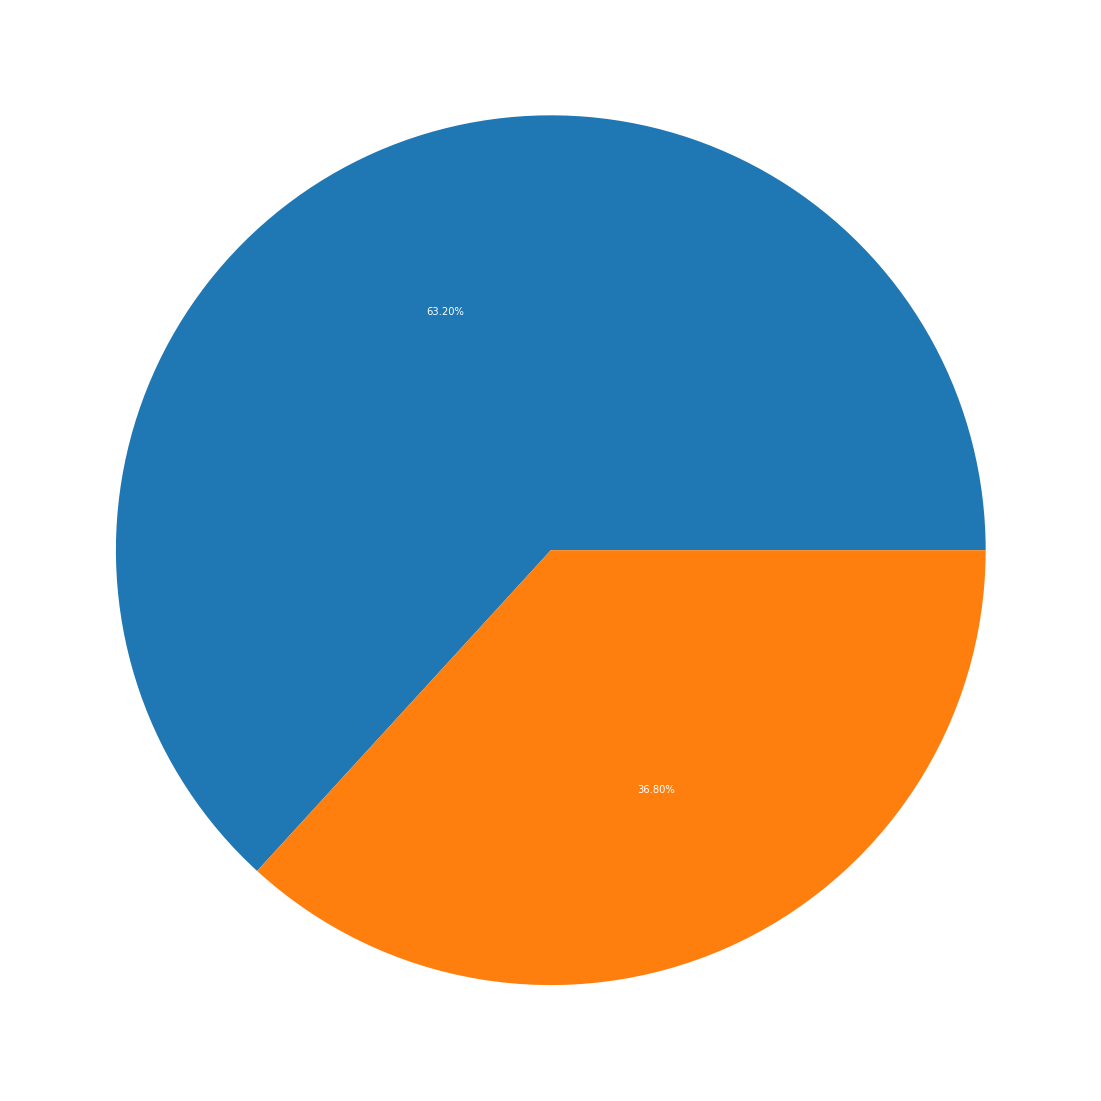

In [8]:
import matplotlib.pylab as plt

fig = plt.figure(figsize = (55, 20))
labels_graph = {'Slow writer': 0, 'Fast writer': 1}
plt.pie(x=data_train.is_fast_writer.value_counts(), labels=labels_graph, autopct='%1.2f%%', textprops={'color':"w"})
plt.show()

# EDA

<AxesSubplot:>

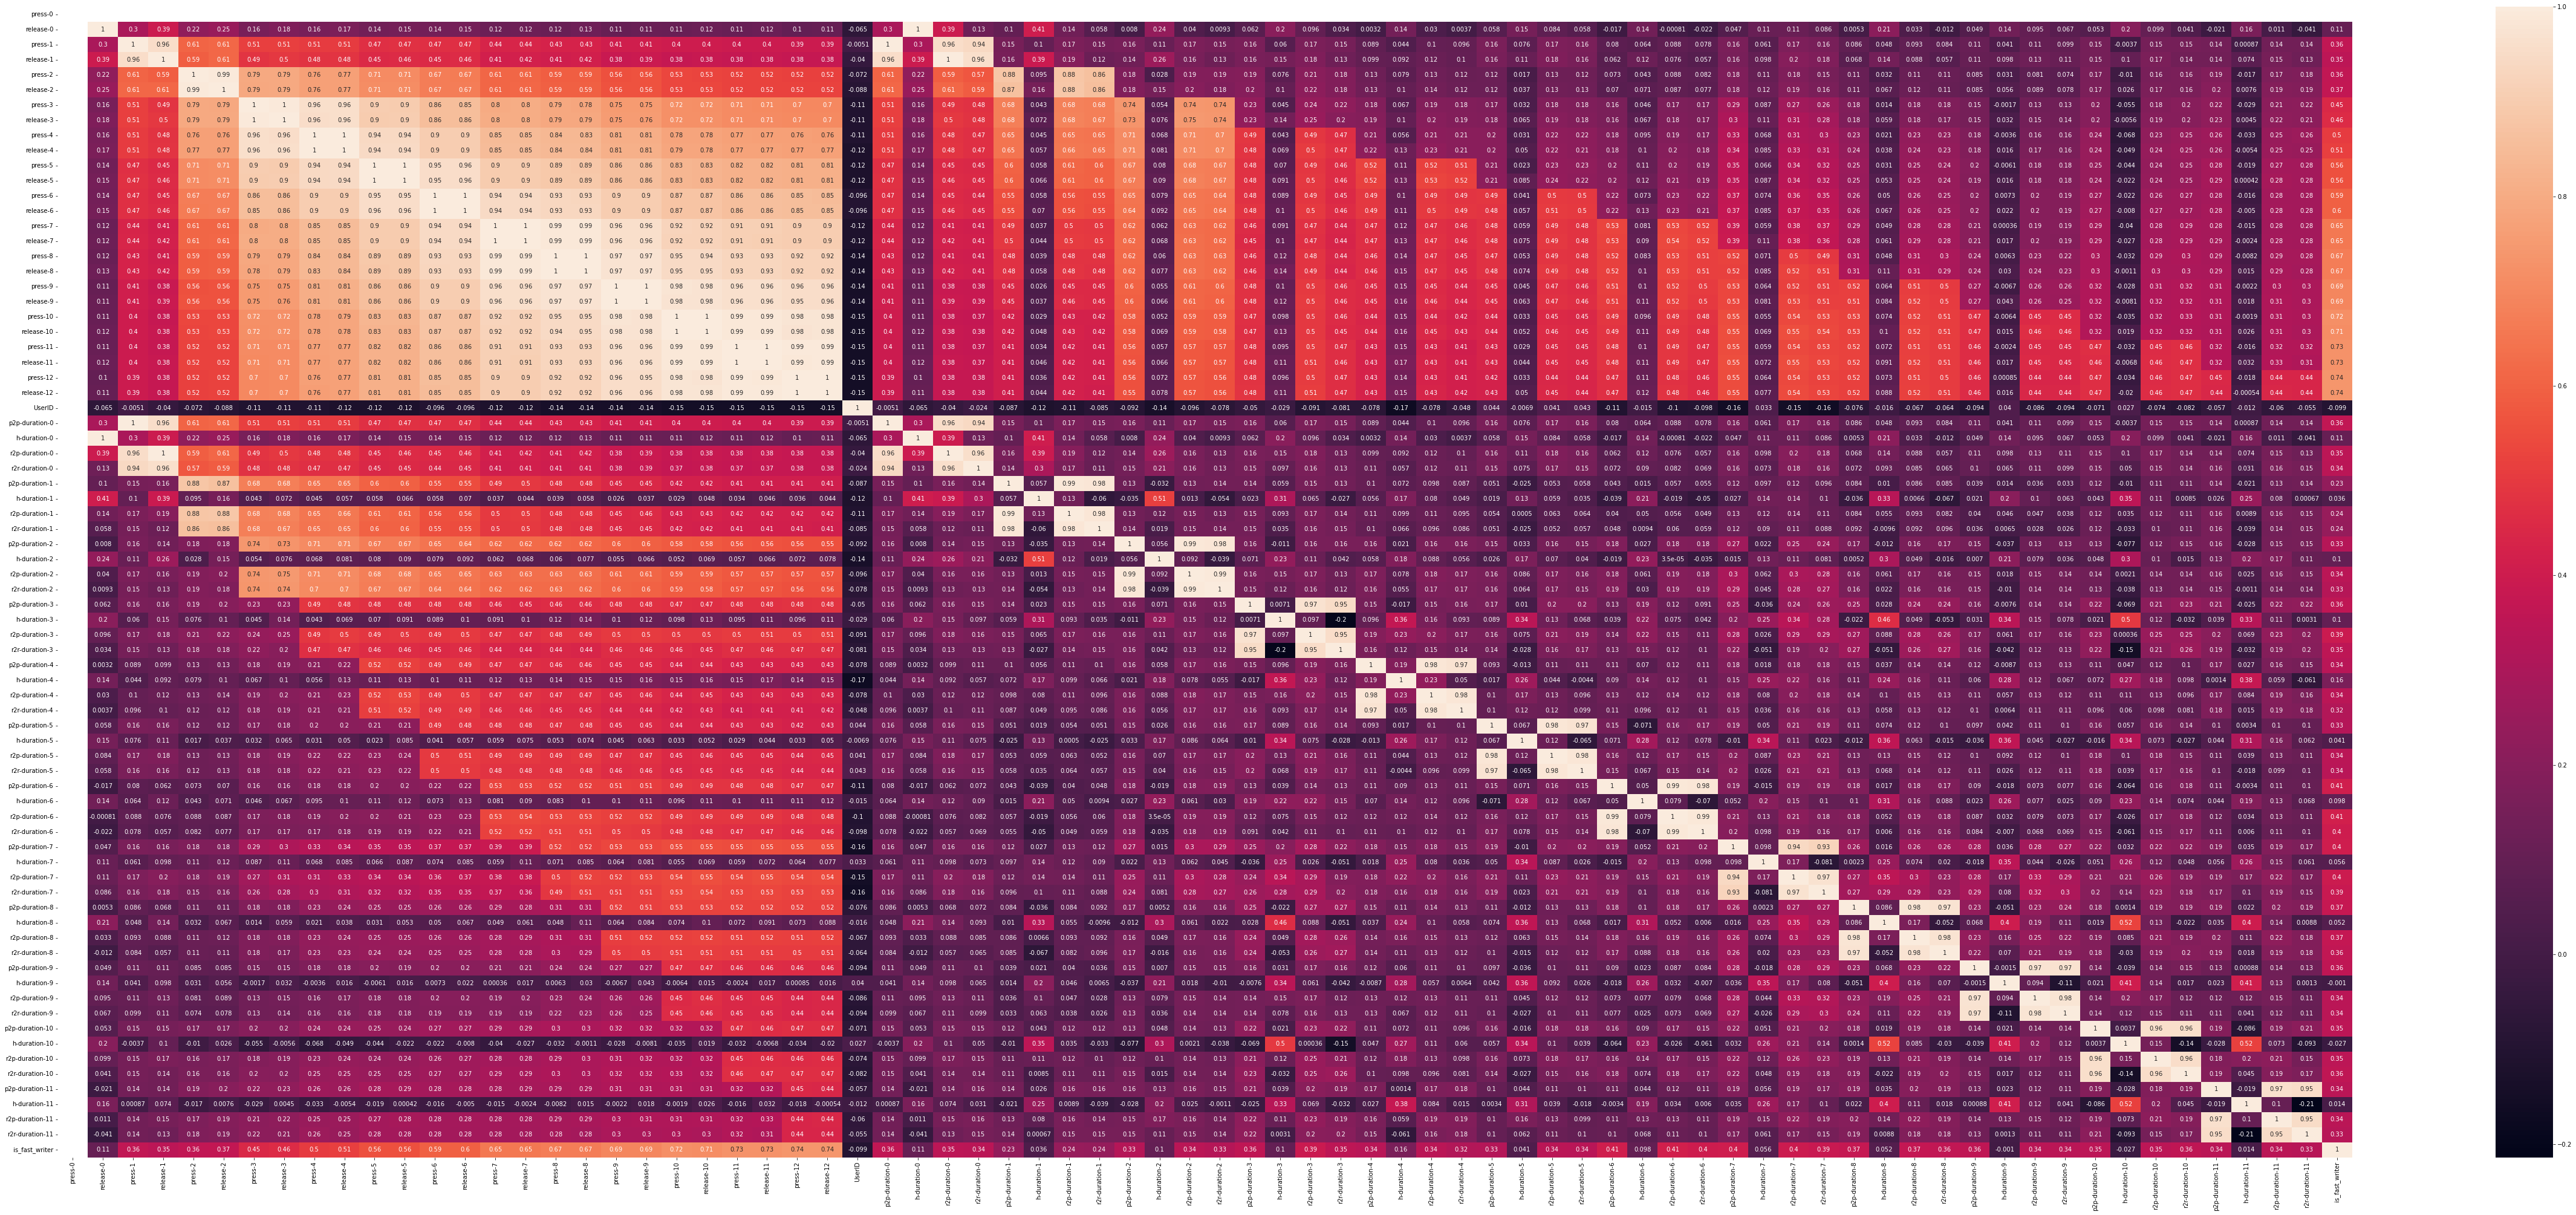

In [9]:
import seaborn as sns
fig = plt.figure(figsize = (85, 35))
sns.heatmap(data_train.corr(), annot=True)

Ebove I can understand that there are some data which I do not need because there are high correlation between various. I do not want to get large data. Therefore, I reduced some columns. Already first columns was not feature, they were only raw data

<AxesSubplot:>

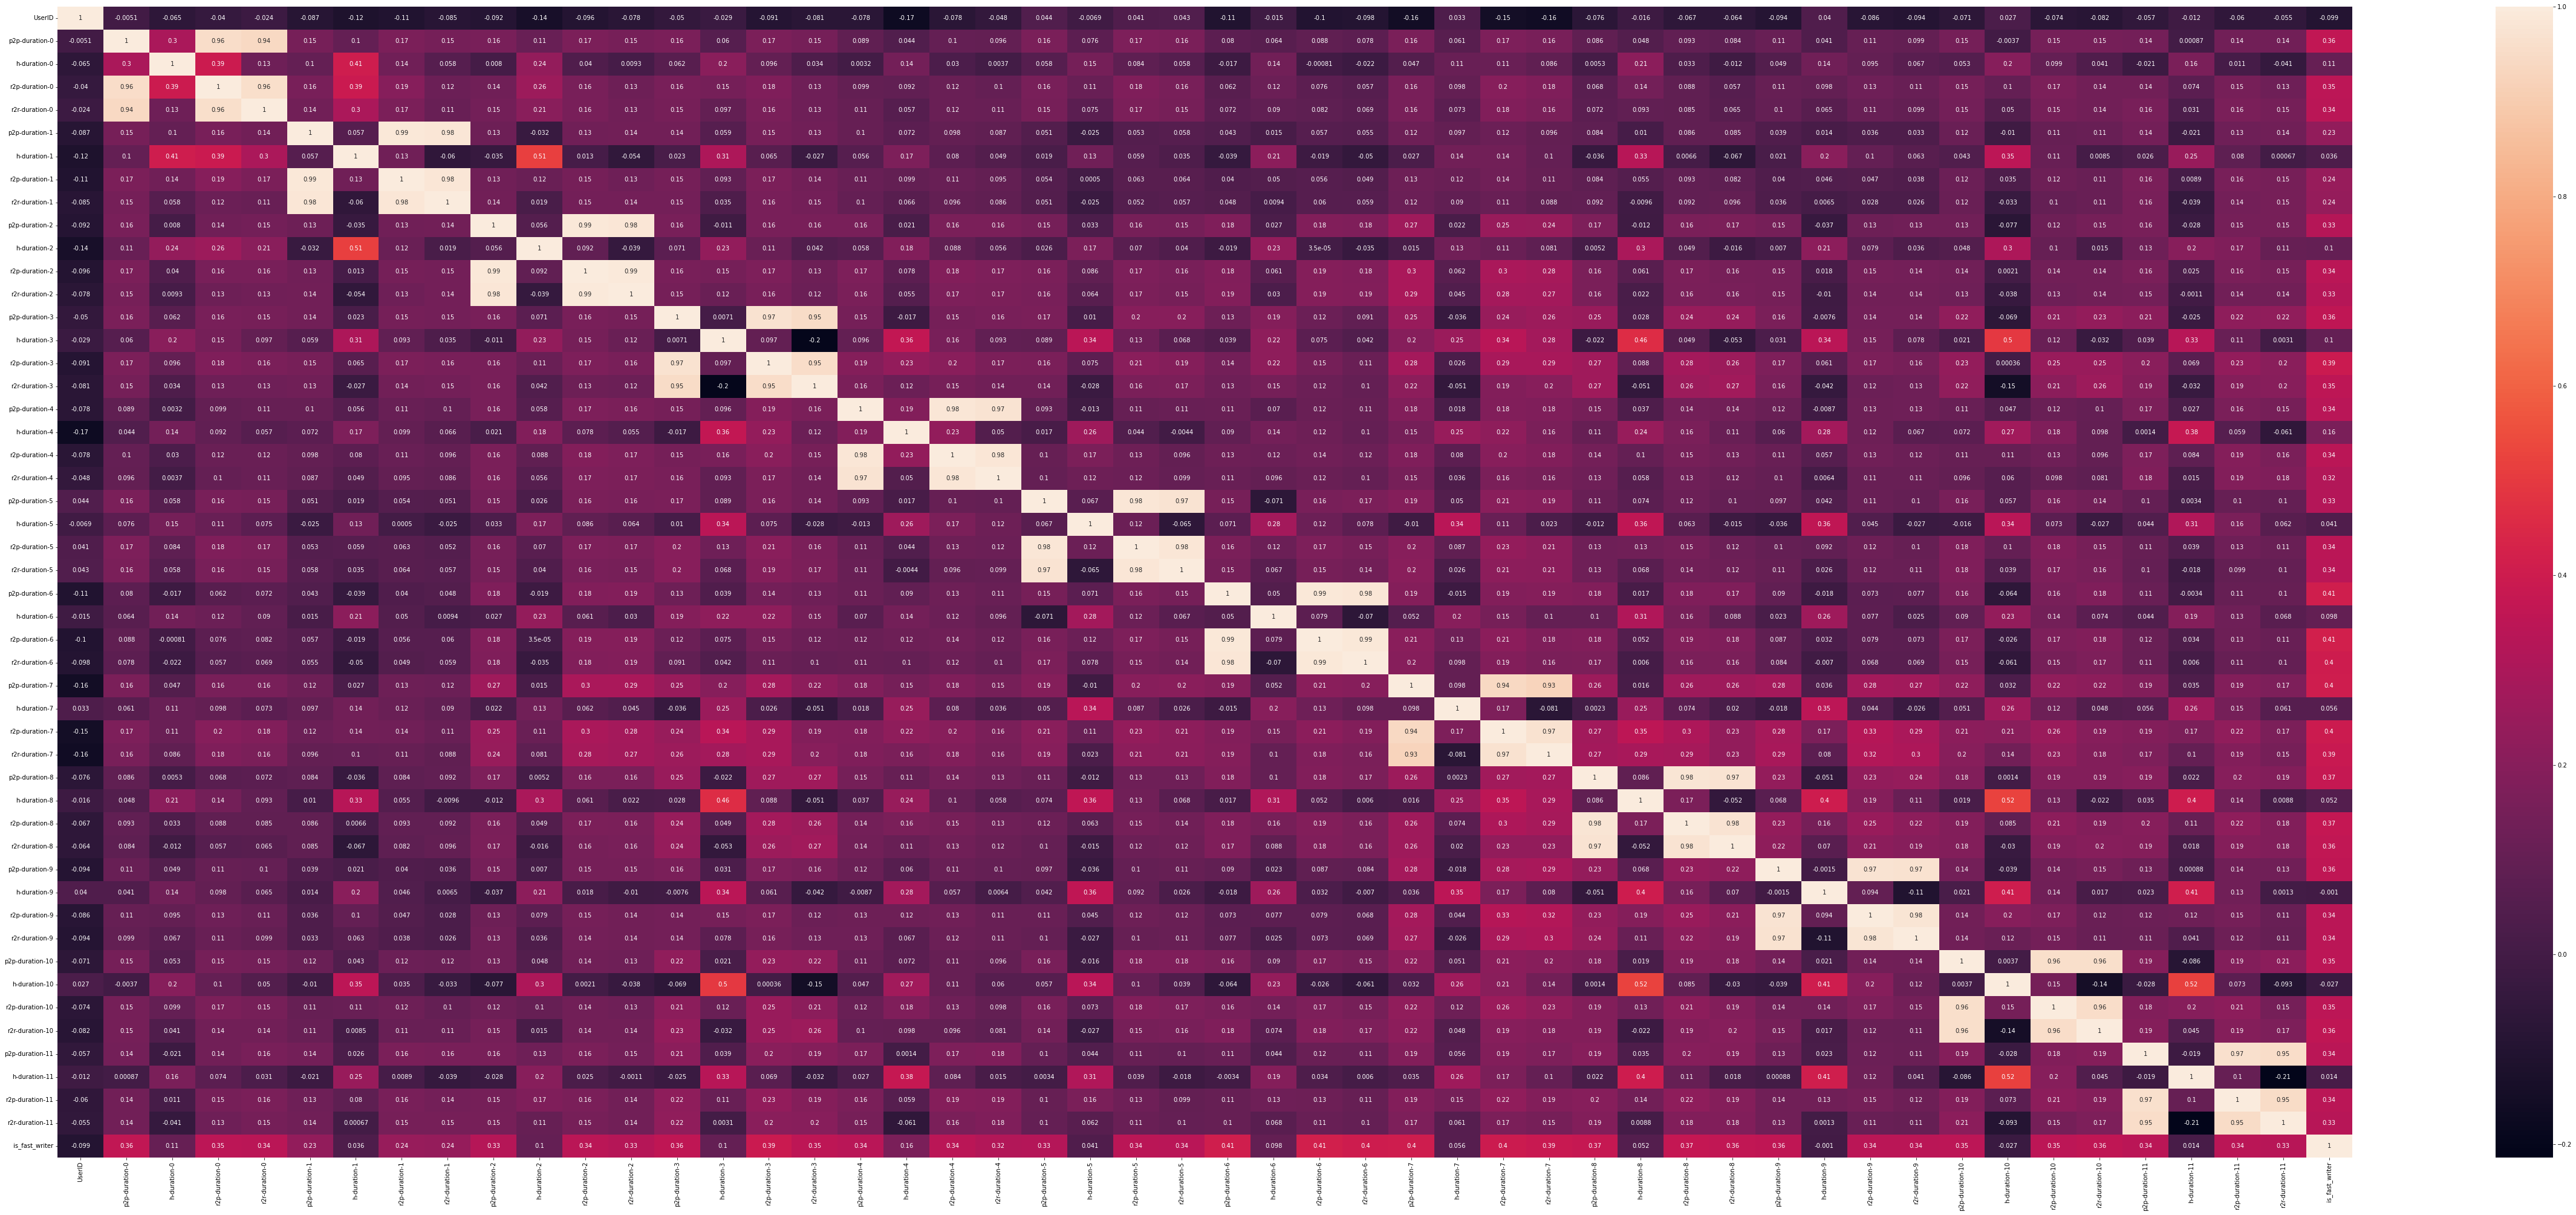

In [11]:
fig = plt.figure(figsize = (85, 35))
sns.heatmap(data_train[data_train.columns[26:]].corr(), annot=True)

As I can see above. There are still some variables which has high correlation. I do not want to get this

Text(0.5, 1.0, 'h-duration vs press')

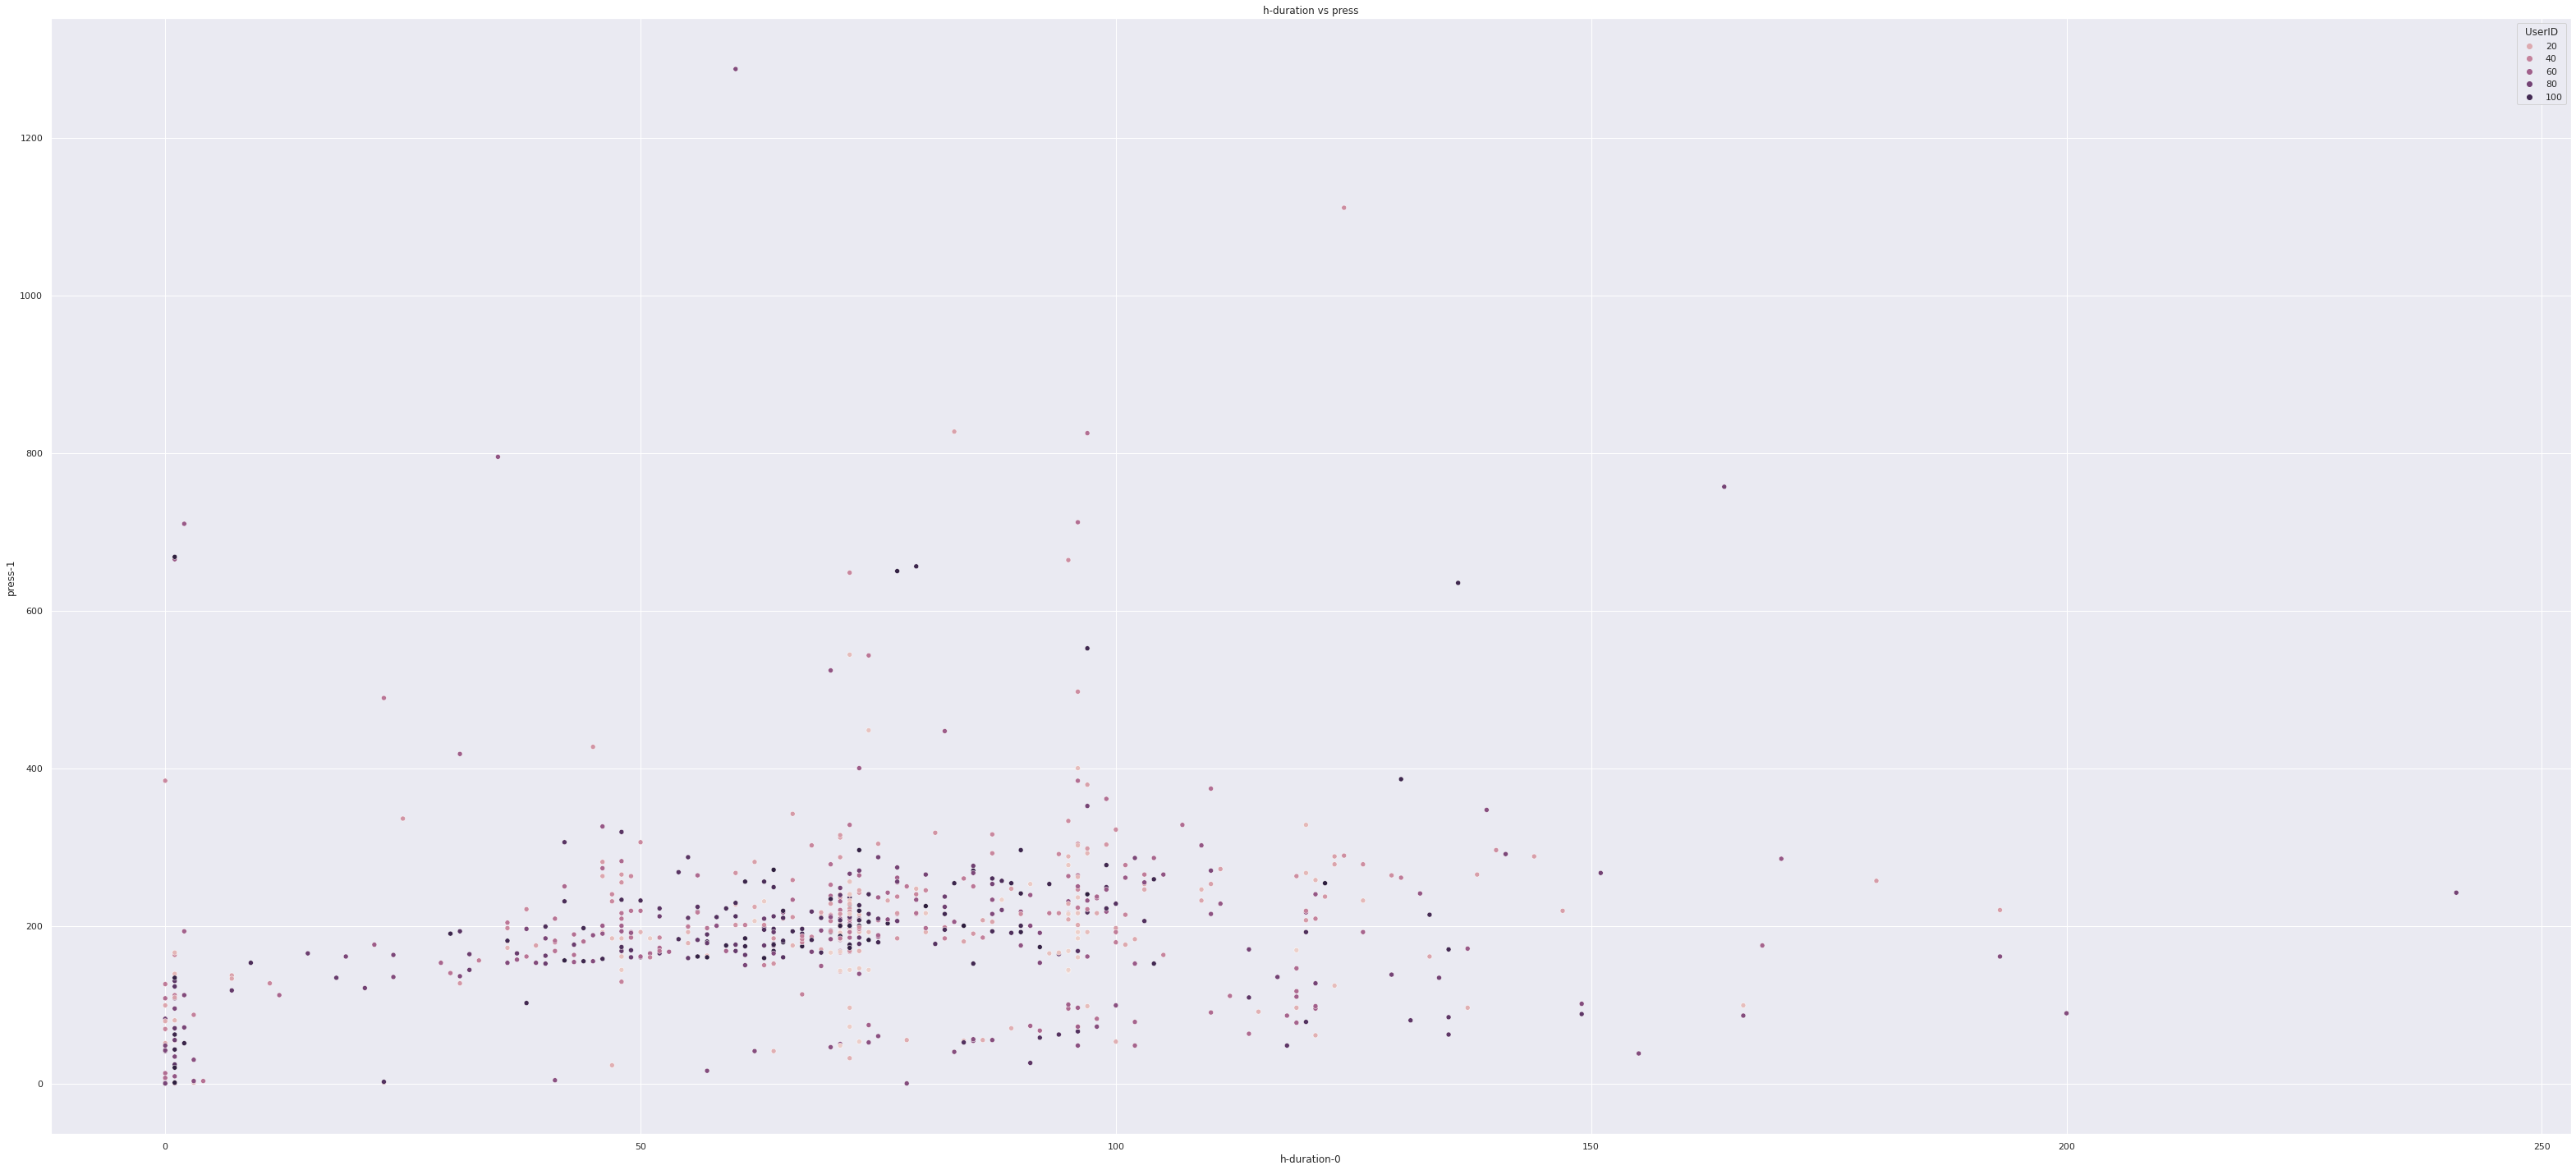

In [12]:
# from that graphic, we can understand the data is linear
sns.set(rc = {'figure.figsize':(55,25)})
for i in range(1):
    ax = sns.scatterplot(x='h-duration-'+str(i),
                         y='press-'+str(i+1),
                         hue='UserID',
                         data=data_train)

ax.get_legend_handles_labels()
ax.set_title('h-duration vs press')

Remove raw data and get features

In [13]:
# p2p, h, r2p, r2r
new_data_train = data_train[data_train.columns[26:]]
new_data_train

UserID  p2p-duration-0  h-duration-0  r2p-duration-0  r2r-duration-0  \
0        73              86           166             271             105   
1        32             196            72             270             198   
2        61             418            31             487             456   
3        77               1             1              45              44   
4        24             312            71             406             335   
..      ...             ...           ...             ...             ...   
745      22             217            69             303             234   
746      13             258           121             547             426   
747      67             795            35             880             845   
748     105             175            59             285             226   
749     100             181            65             253             188   

     p2p-duration-1  h-duration-1  r2p-duration-1  r2r-duration-1  \
0               114           185             210              25   
1               119            74             221             147   
2               205            69             277             208   
3               145            44             200             156   
4              1517            94            1614            1520   
..              ...           ...             ...             ...   
745             236            86             308             222   
746             214           289             411             122   
747             164            85             232             147   
748             193           110             269             159   
749             215            72             256             184   

     p2p-duration-2  ...  r2r-duration-9  p2p-duration-10  h-duration-10  \
0               164  ...             202              134            229   
1               229  ...             179              233             79   
2               157  ...             168              169             49   
3               240  ...             249              231             71   
4               234  ...             352              177            176   
..              ...  ...             ...              ...            ...   
745             121  ...             224               51             83   
746             197  ...             161              212            112   
747             380  ...             168               96             43   
748             146  ...             130              161             93   
749             105  ...             200              101             58   

     r2p-duration-10  r2r-duration-10  p2p-duration-11  h-duration-11  \
0                322               93               95            188   
1                304              225              216             71   
2                217              168              145             48   
3                301              230              256             70   
4                304              128              127            127   
..               ...              ...              ...            ...   
745              157               74              234            106   
746              279              167              188             67   
747              139               96              179             43   
748              228              135              239             67   
749              162              104              219             61   

     r2p-duration-11  r2r-duration-11  is_fast_writer  
0                299              111               0  
1                296              225               0  
2                192              144               1  
3                343              273               0  
4                274              147               1  
..               ...              ...             ...  
745              302              196               0  
746          

Normalize all data and classify them as fast and slow writer for each keystrike

In [14]:
import warnings
warnings.filterwarnings('ignore')

# p2p, h, r2p, r2r
new_data_train = data_train[data_train.columns[26:]]

for i, col in enumerate(new_data_train.columns):
    if (i > 0) and (i != len(new_data_train.columns)-1):
        max_val = new_data_train[col].nlargest(6).values[-1]
        normalized_data = new_data_train[col].values / max_val
        normalized_data = np.where(normalized_data > 1, 1, normalized_data)
        normalized_data = np.where(normalized_data < np.average(normalized_data), 0, 1)
        
        if col.split("-")[0] == 'p2p':
            new_data_train[f"p2p-{int(i/4)}"] = normalized_data
            #print(f"p2p-{int(i/4)}")
            
        elif col.split("-")[0] == 'h':
            new_data_train[f"h-{int(i/4)}"] = normalized_data
            #print(f"h-{int(i/4)}")
            
        elif col.split("-")[0] == 'r2p':
            new_data_train[f"r2p-{int(i/4)}"] = normalized_data
            #print(f"r2p-{int(i/4)}")
            
        elif col.split("-")[0] == 'r2r':
            new_data_train[f"r2r-{int(i/4)-1}"] = normalized_data
            #print(f"r2r-{int(i/4)-1}\n")
new_data_train

UserID  p2p-duration-0  h-duration-0  r2p-duration-0  r2r-duration-0  \
0        73              86           166             271             105   
1        32             196            72             270             198   
2        61             418            31             487             456   
3        77               1             1              45              44   
4        24             312            71             406             335   
..      ...             ...           ...             ...             ...   
745      22             217            69             303             234   
746      13             258           121             547             426   
747      67             795            35             880             845   
748     105             175            59             285             226   
749     100             181            65             253             188   

     p2p-duration-1  h-duration-1  r2p-duration-1  r2r-duration-1  \
0               114           185             210              25   
1               119            74             221             147   
2               205            69             277             208   
3               145            44             200             156   
4              1517            94            1614            1520   
..              ...           ...             ...             ...   
745             236            86             308             222   
746             214           289             411             122   
747             164            85             232             147   
748             193           110             269             159   
749             215            72             256             184   

     p2p-duration-2  ...  r2p-9  r2r-9  p2p-10  h-10  r2p-10  r2r-10  p2p-11  \
0               164  ...      1      0       0     1       1       0       0   
1               229  ...      0      0       1     0       1       1       0   
2               157  ...      0      0       0     0       0       0       0   
3               240  ...      1      1       1     0       1       1       1   
4               234  ...      1      1       0     1       1       0       0   
..              ...  ...    ...    ...     ...   ...     ...     ...     ...   
745             121  ...      1      1       0     0       0       0       1   
746             197  ...      0      0       1     1       1       0       0   
747             380  ...      0      0       0     0       0       0       0   
748             146  ...      0      0       0     0       0       0       1   
749             105  ...      0      0       0     0       0       0       1   

     h-11  r2p-11  r2r-11  
0       1       0       0  
1       0       0       1  
2       0       0       0  
3       0       1       1  
4       1       0       0  
..    ...     ...     ...  
745     1       0       0  
746     0       0       0  
747     0       0       0  
748     0       0       1  
749     0       0       0  

[750 rows x 98 columns]

Get only classified features

In [16]:
columns = new_data_train.columns[49:].values
columns = np.append(columns, "UserID")
# silinebilir
new_data_train = new_data_train[columns]
new_data_train

is_fast_writer  p2p-0  h-0  r2p-0  r2r-0  p2p-1  h-1  r2p-1  r2r-1  \
0                 0      0    1      0      0      0    1      0      0   
1                 0      1    1      0      0      0    0      0      0   
2                 1      1    0      1      1      1    0      1      1   
3                 0      0    0      0      0      0    0      0      0   
4                 1      1    1      1      1      1    1      1      1   
..              ...    ...  ...    ...    ...    ...  ...    ...    ...   
745               0      1    1      1      1      1    0      1      1   
746               1      1    1      1      1      1    1      1      0   
747               1      1    0      1      1      0    0      0      0   
748               0      0    0      1      1      1    1      1      0   
749               0      0    0      0      0      1    0      0      1   

     p2p-2  ...  r2r-9  p2p-10  h-10  r2p-10  r2r-10  p2p-11  h-11  r2p-11  \
0        0  ...      0       0     1       1       0       0     1       0   
1        0  ...      0       1     0       1       1       0     0       0   
2        0  ...      0       0     0       0       0       0     0       0   
3        0  ...      1       1     0       1       1       1     0       1   
4        0  ...      1       0     1       1       0       0     1       0   
..     ...  ...    ...     ...   ...     ...     ...     ...   ...     ...   
745      0  ...      1       0     0       0       0       1     1       0   
746      0  ...      0       1     1       1       0       0     0       0   
747      1  ...      0       0     0       0       0       0     0       0   
748      0  ...      0       0     0       0       0       1     0       0   
749      0  ...      0       0     0       0       0       1     0       0   

     r2r-11  UserID  
0         0      73  
1         1      32  
2         0      61  
3         1      77  
4         0      24  
..      ...     ...  
745       0      22  
746       0      13  
747       0      67  
748       1     105  
749       0     100  

[750 rows x 50 columns]

I have lot of features. I need to check if there are some features for I can ignore

Text(0, 0.5, 'Cumulative explained variance')

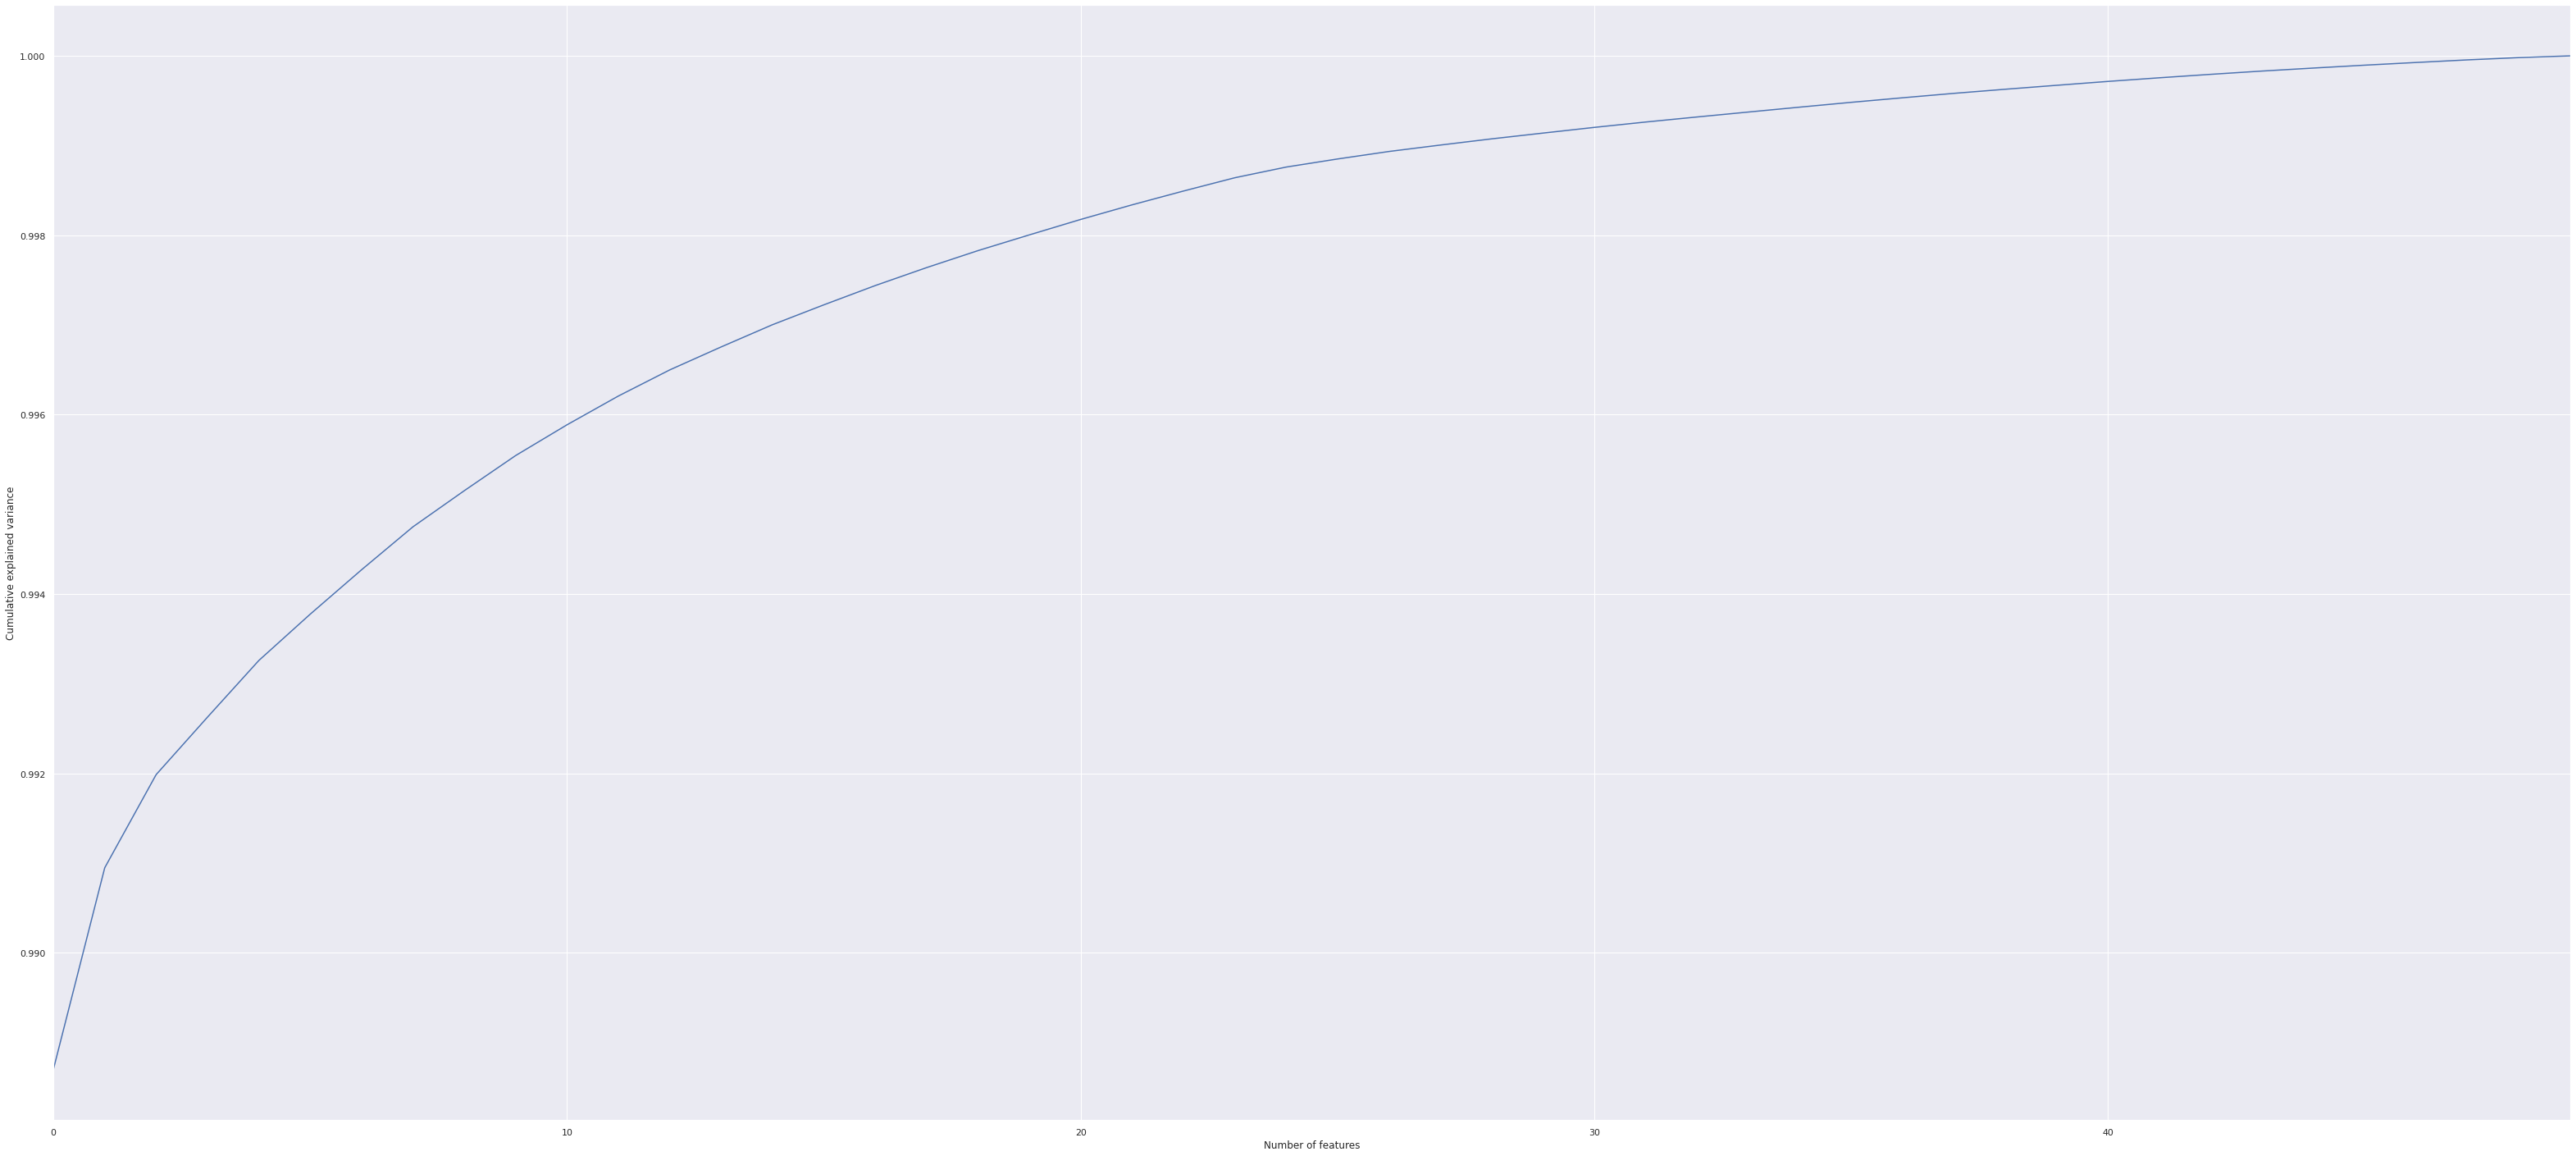

In [17]:
from sklearn.decomposition import PCA
pca = PCA().fit(new_data_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,49,1)
plt.xlabel('Number of features')
plt.ylabel('Cumulative explained variance')

From above, I understand that we can use only 10 class. Others does not make much sense because

Visualize ID number 1 activities. If behavers are similar or not

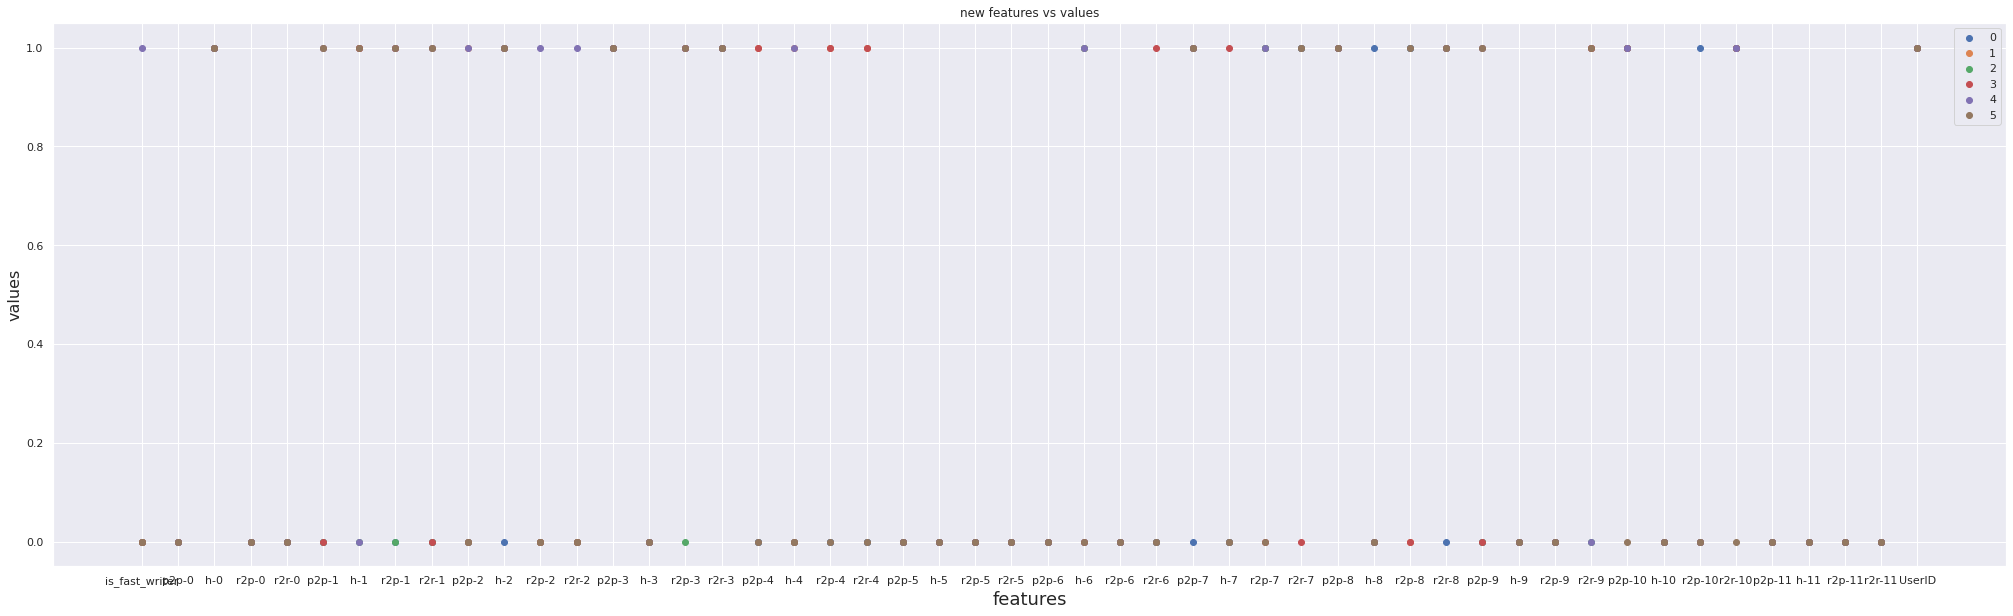

In [20]:
new_data_train[new_data_train.columns[49:]][new_data_train["UserID"]==1].values
fig = plt.figure(figsize = (35, 10))
for i in range(6):
    vis_labels = new_data_train[new_data_train["UserID"]==1].keys()
    vis_values = new_data_train[new_data_train["UserID"]==1].values[i]
    plt.scatter(vis_labels, vis_values, marker="o", label=i)
plt.title("new features vs values")
plt.xlabel('features', fontsize=18)
plt.ylabel('values', fontsize=16)
plt.legend()
plt.show()

Check again the features if there are correlation

<AxesSubplot:>

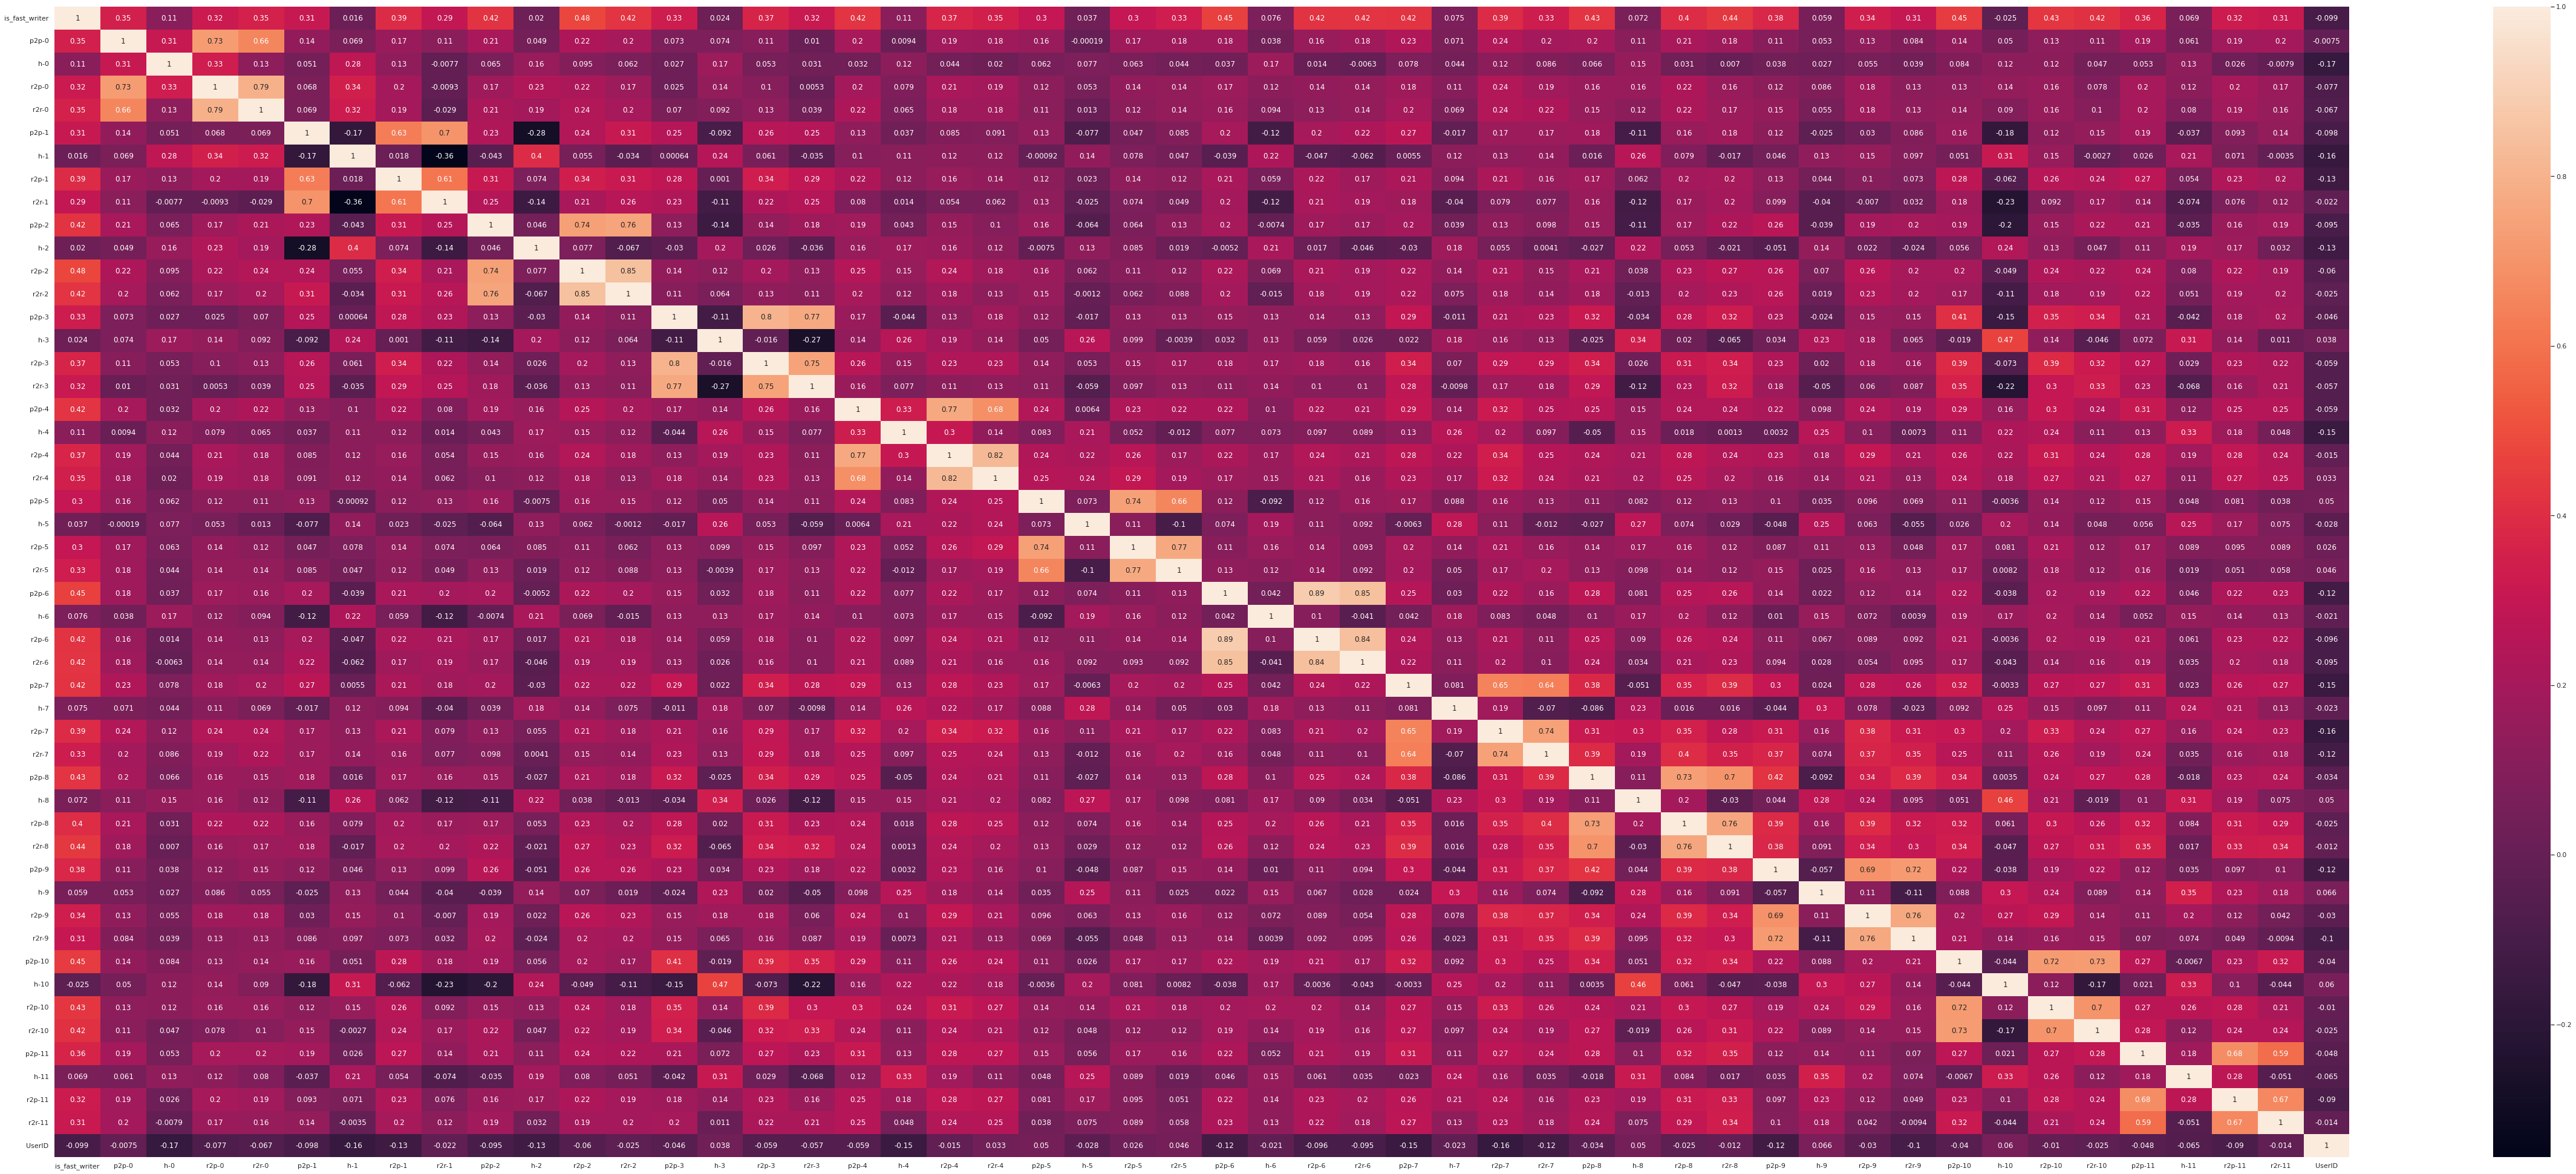

In [21]:
fig = plt.figure(figsize = (85, 35))
sns.heatmap(new_data_train.corr(), annot=True)

As I can understand from above, hold duration(dwell time) are less correlated. Others are looking similar features. Therefore, I prefered to use is_fast_writer and hold duration features

In [23]:
new_data_train.columns
selected_features = [f"h-{i}" for i in range(12)]
selected_features.append("is_fast_writer")
selected_features.append("UserID")
new_data_train[selected_features[:-1]]

h-0  h-1  h-2  h-3  h-4  h-5  h-6  h-7  h-8  h-9  h-10  h-11  \
0      1    1    1    1    1    1    1    1    1    1     1     1   
1      1    0    1    0    0    0    1    0    0    1     0     0   
2      0    0    0    0    0    0    0    0    0    0     0     0   
3      0    0    0    0    1    1    0    1    1    0     0     0   
4      1    1    1    1    1    1    0    1    1    1     1     1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
745    1    0    0    1    1    0    0    0    0    0     0     1   
746    1    1    1    1    1    1    1    1    1    0     1     0   
747    0    0    0    0    0    0    0    0    0    0     0     0   
748    0    1    0    0    1    1    1    1    0    1     0     0   
749    0    0    0    0    0    0    0    0    0    0     0     0   

     is_fast_writer  
0                 0  
1                 0  
2                 1  
3                 0  
4                 1  
..              ...  
745               0  
746               1  
747               1  
748               0  
749               0  

[750 rows x 13 columns]

# Modeling and Evaluation

In that part I want to train and evaluate multiple classifier. Therefore, I wrote a class which I can train and evaluate

In [24]:
from sklearn.model_selection import train_test_split

labels = new_data_train["UserID"]
features = new_data_train[selected_features[:-1]]
#features = new_data_train.drop(columns=['UserID'])
#features = new_data_train[new_data_train.columns[49:]]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, shuffle=True)
X_test, V_test, y_test, v_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(V_test.shape)
print(v_test.shape)

(502, 13)
(502,)
(124, 13)
(124,)
(124, 13)
(124,)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from xgboost.sklearn import XGBClassifier
import math
import numpy as np
from sklearn.metrics import roc_curve



class Trainer:
    def __init__(self, RandomForestClassifier, SVC, XGBClassifier, KNeighborsClassifier, GaussianProcessClassifier, DecisionTreeClassifier, AdaBoostClassifier, GaussianNB):
        self.RF = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=13)
        self.svm = SVC(kernel="linear")
        self.mlp = MLPClassifier(alpha=1, max_iter=1000)
        self.knn = KNeighborsClassifier(1)
        self.gpc = GaussianProcessClassifier()
        self.dtc = DecisionTreeClassifier()
        self.ada = AdaBoostClassifier()
        self.gnb = GaussianNB()     
        self.XGBC = XGBClassifier(
            learning_rate =0.5,
            n_estimators=10,
            max_depth=5,
            min_child_weight=3,
            gamma=0,
            subsample=0.8,
            colsample_bytree=0.8,
            objective= 'multi:softmax',
            num_class=100,
            nthread=4,
            seed=27
        )
    
    def train(self, X_train, y_train, X_test, y_test):
        model_names = [self.RF, self.svm, self.mlp, self.knn, self.gpc, self.dtc, self.ada, self.gnb, self.XGBC]
        results = []
        best = model_names[0]
        for model_name in model_names:
            print(f"Processing {str(model_name)} ....")
            result = {
                'Model': str(model_name),
                'acc': float,
                'f1': float,
                'precision': float,
                'recall': float
            }
            model = model_name.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            
            result['acc'] = acc
            result['f1'] = f1
            result['precision'] = precision
            result['recall'] = recall

            for item in results:
                if acc > item['acc']:
                    best = model

            results.append(result)
        
        return results, best

In [27]:
model_trainer = Trainer(RandomForestClassifier, SVC, XGBClassifier, KNeighborsClassifier, GaussianProcessClassifier, DecisionTreeClassifier, AdaBoostClassifier, GaussianNB)
results, best = model_trainer.train(X_train, y_train, X_test, y_test)

Processing RandomForestClassifier(max_depth=5, max_features=13, n_estimators=10) ....
Processing SVC(kernel='linear') ....
Processing MLPClassifier(alpha=1, max_iter=1000) ....
Processing KNeighborsClassifier(n_neighbors=1) ....
Processing GaussianProcessClassifier() ....
Processing DecisionTreeClassifier() ....
Processing AdaBoostClassifier() ....
Processing GaussianNB() ....
Processing XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, nthread=4, num_class=100,
              num_parallel_tree=None, objective='multi:softmax', predictor=None,
              random_state=None, reg_alpha=None, reg_lambda=N

show results

In [28]:
results

[{'Model': 'RandomForestClassifier(max_depth=5, max_features=13, n_estimators=10)',
  'acc': 0.12903225806451613,
  'f1': 0.11370967741935484,
  'precision': 0.13602150537634408,
  'recall': 0.12903225806451613},
 {'Model': "SVC(kernel='linear')",
  'acc': 0.1774193548387097,
  'f1': 0.185752688172043,
  'precision': 0.23521505376344085,
  'recall': 0.1774193548387097},
 {'Model': 'MLPClassifier(alpha=1, max_iter=1000)',
  'acc': 0.16129032258064516,
  'f1': 0.14596774193548384,
  'precision': 0.1700268817204301,
  'recall': 0.16129032258064516},
 {'Model': 'KNeighborsClassifier(n_neighbors=1)',
  'acc': 0.14516129032258066,
  'f1': 0.13870967741935483,
  'precision': 0.1525537634408602,
  'recall': 0.14516129032258066},
 {'Model': 'GaussianProcessClassifier()',
  'acc': 0.1532258064516129,
  'f1': 0.1435483870967742,
  'precision': 0.1696236559139785,
  'recall': 0.1532258064516129},
 {'Model': 'DecisionTreeClassifier()',
  'acc': 0.12096774193548387,
  'f1': 0.10241935483870968,
  'p